<a href="https://colab.research.google.com/github/ashwinimanoj/fastai/blob/master/FastAI_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lession 1

## Init file with

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import * 

### Fine grain classification - cat vs dog  

In [0]:
path = untar_data(URLs.PETS)

In [15]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_anno = path/'annotations'
path_images = path/'images'

In [17]:
fnames = get_image_files(path_images)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pug_119.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_setter_66.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/beagle_13.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_122.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/boxer_186.jpg')]

In [0]:
label_pattern = r'([^/]+)_\d+.jpg$'

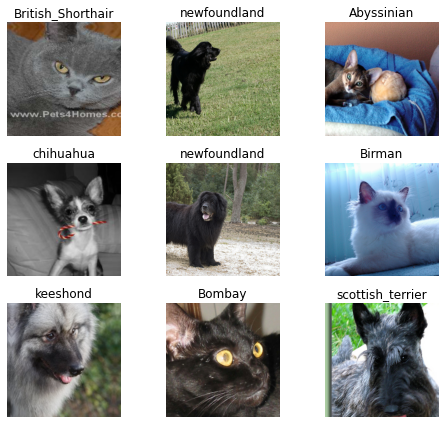

In [19]:
# Usually 224 * 224 are the size of images most models tend to use so that GPU can apply ops efficiently and uniformly
data = ImageDataBunch.from_name_re(path_images, fnames, label_pattern, ds_tfms=get_transforms(), size=224)
# Set RGB to have mean of 0 and standard deviation of 1, important for training models
data.normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(7,6))

In [20]:
# Possible label names are called classes
print(data.classes)
# c = think of it has no of classes
len(data.classes)
data.c  

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


37

## Training 

In [0]:
# Using resnet34 model (smaller than resnet50 to train faster).
# The model was trained with some images already.

# What we are doing is taking a model that already knows how to do something 
# well and turn it to something that can do what you want well.
# Thus, much less time is needed to train the model to fit your need.

# Using a validation set the model asked to predict for this set and the error
# rate on that set is shown.
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [28]:
# Use fit_one_cycle instead of fit
# 4 is the number of times that the data is shown to the model to learn from
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.412596,0.335338,0.116373,01:21
1,0.635192,0.275192,0.089310,01:20
2,0.375906,0.219994,0.071042,01:22
3,0.259157,0.218588,0.075778,01:24
